# Option Charts
> Tool for drawing option payoff charts.

- toc: true
- branch: master
- badges: true
- comments: true
- author: Stephen Zagar
- categories: [peak6, options, tools]

## Payoff Calculations

In [1]:
def short_call(premium: float,strike: float, uprices: list[float], multiplier=1, label: str = "short call"):
    payoff = [min(premium*multiplier, -(i - strike-premium)*multiplier) for i in uprices]
    return { 'payoff': payoff, 'label': label}

In [2]:
def long_call(premium: float, strike: float, uprices: list[float], multiplier=1, label: str = "long call"):
    payoff = [max(-premium*multiplier, (i-strike-premium)*multiplier) for i in uprices]
    return { 'payoff': payoff, 'label': label}

In [3]:
def long_put(premium: float,strike: float, uprices: list[float], multiplier=1, label: str = "long put"):
    payoff = [max(-premium*multiplier, (strike-i-premium)*multiplier) for i in uprices]
    return { 'payoff': payoff, 'label': label}

In [4]:
def short_put(premium: float,strike: float, uprices: list[float], multiplier=1, label: str = "short put"):
    payoff = [min(premium*multiplier, -(strike-i-premium)*multiplier) for i in uprices]
    return { 'payoff': payoff, 'label': label}

In [5]:
def long_underlying(price: float, uprices: list[float], multiplier=1, label:str = "long underlying"):
    payoff = [(i-price)*multiplier for i in uprices]
    label = "long underlying"
    return { 'payoff': payoff, 'label': label}

In [6]:
def short_underlying(price: float, uprices: list[float], multiplier=1, label:str = "short underlying"):
    payoff = [(price-i)*multiplier for i in uprices]
    label = "long underlying"
    return { 'payoff': payoff, 'label': label}

## Plotting

In [7]:
def plot_strategy_payoff(name: str, legs: {list, str}):
    payoffs = [leg['payoff'] for leg in legs]
    strategy_payoff = np.sum(payoffs,axis=0)

    plt.figure(figsize=(20,11))
    for leg in legs:
        plt.plot(uprices, leg['payoff'], label=leg['label'], linestyle='dashed')
    plt.plot(uprices, strategy_payoff, label=name, linewidth=3)
    
    plt.legend(fontsize = 20)
    plt.xlabel('Underlying Price at Expiry',fontsize = 15)
    plt.ylabel('Payoff',fontsize = 15)
    plt.title(f'{name} Strategy Payoff at Expiration',fontsize = 20)
    plt.grid(True)

## Examples

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
call_price = 10
put_price = 10

# prices of underlying at expiration date
uprices = np.arange(110,230,1)

#### Long Call

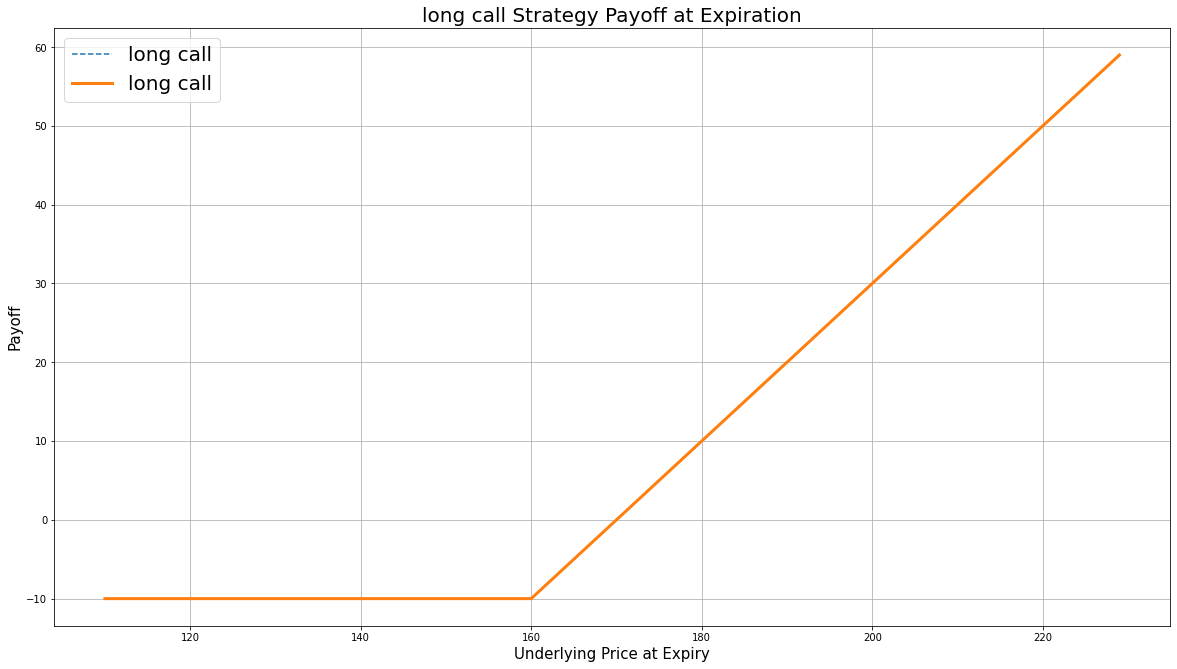

In [10]:
legs = []
legs.append(long_call(premium=call_price, strike = 160, uprices = uprices))

plot_strategy_payoff('long call', legs)

#### Short Call

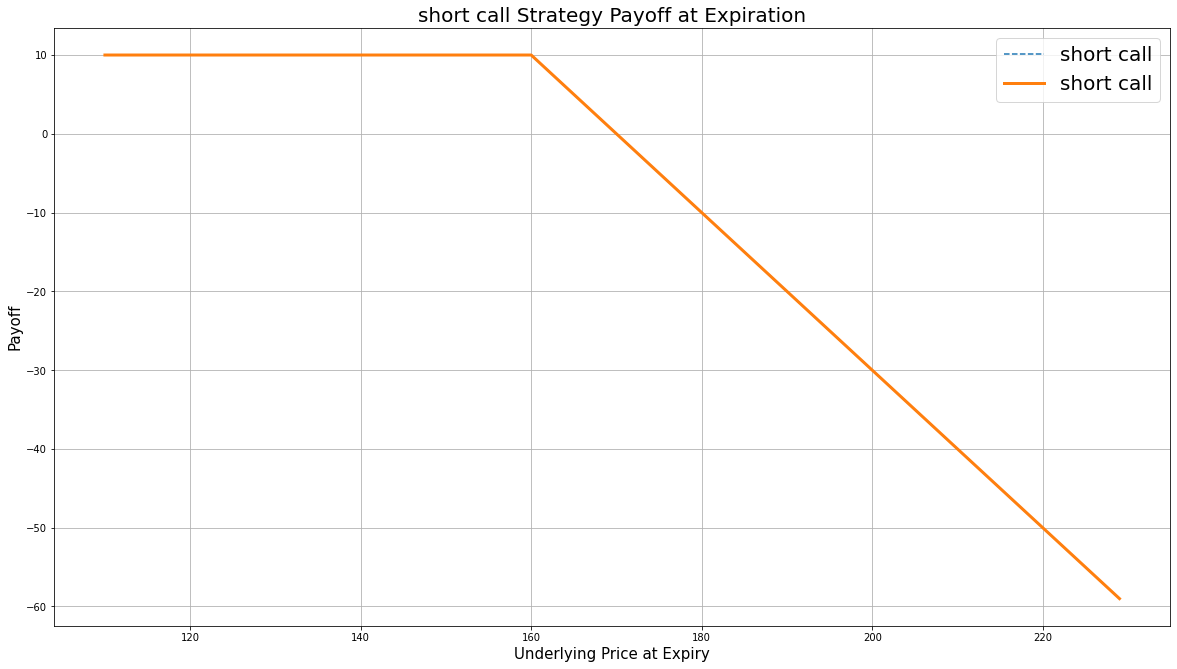

In [11]:
legs = []
legs.append(short_call(premium=call_price, strike = 160, uprices = uprices))

plot_strategy_payoff('short call', legs)

#### Long Put

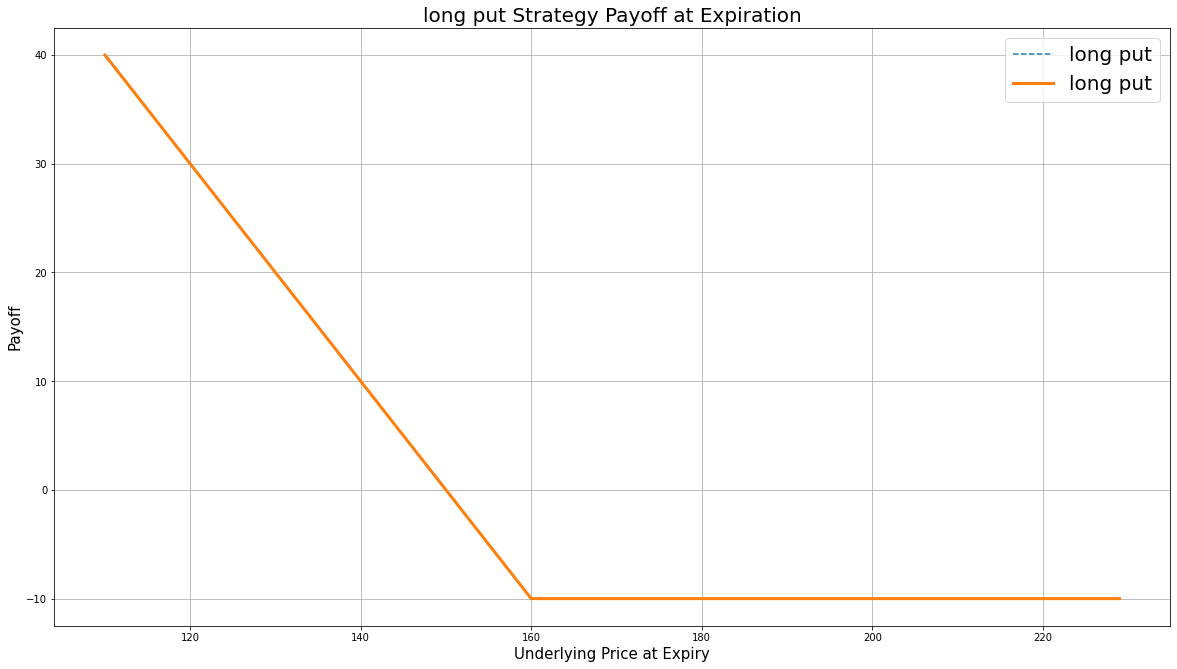

In [12]:
legs = []
legs.append(long_put(premium=put_price, strike = 160, uprices = uprices))

plot_strategy_payoff('long put', legs)

#### Short Put

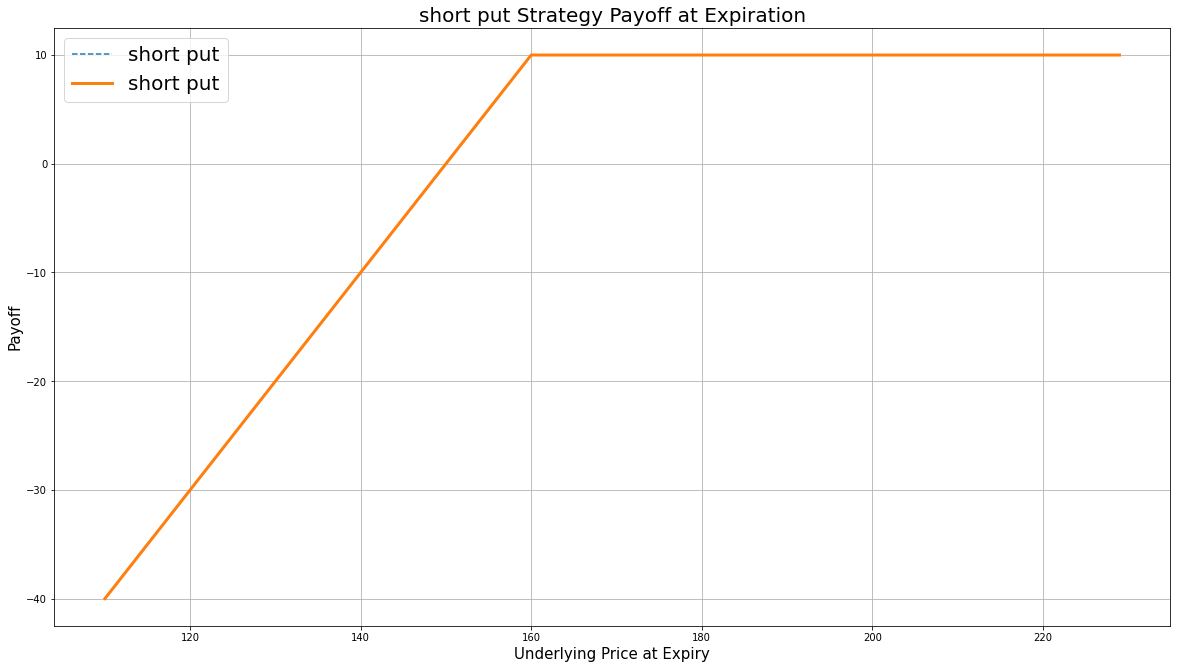

In [13]:
legs = []
legs.append(short_put(premium=put_price, strike = 160, uprices = uprices))

plot_strategy_payoff('short put', legs)

#### Covered Call

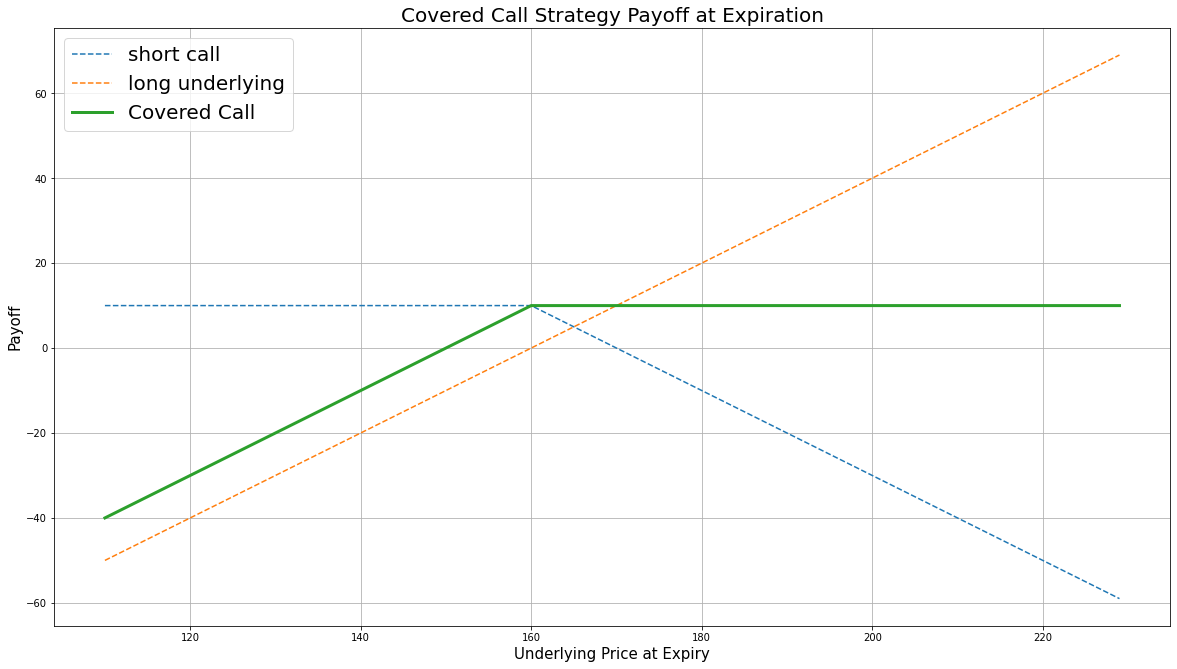

In [14]:
legs = []
legs.append(short_call(premium=call_price, strike = 160, uprices = uprices))
legs.append(long_underlying(price = 160, uprices = uprices))

plot_strategy_payoff('Covered Call', legs)

### Married Put

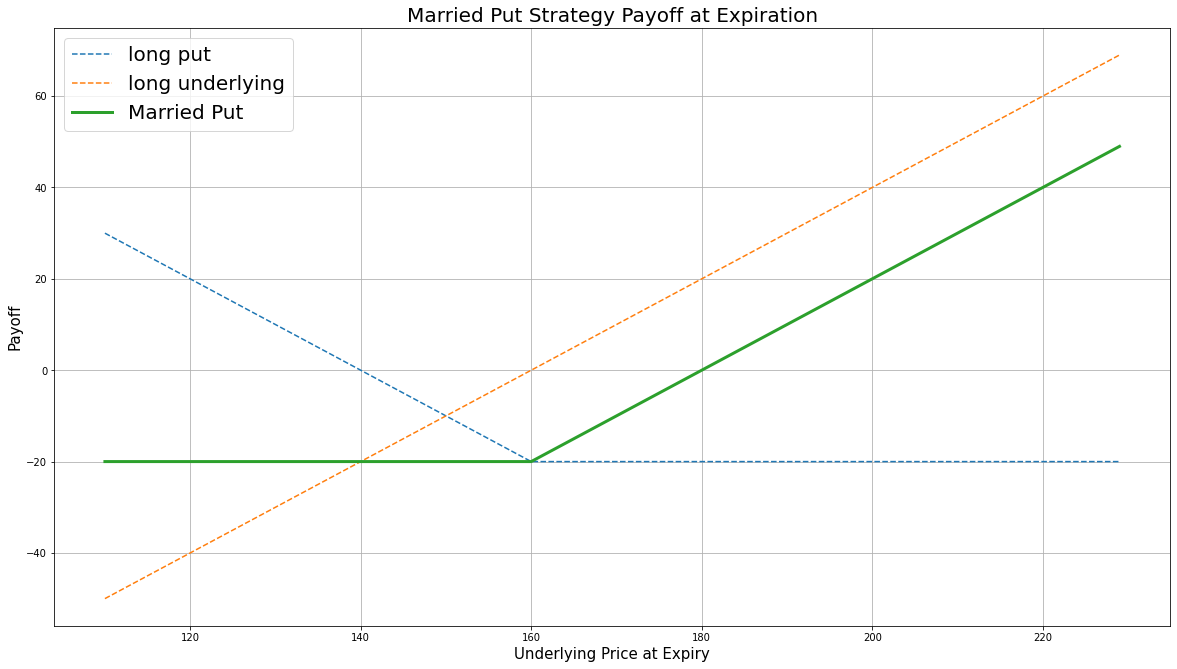

In [16]:
put_strike = 160
put_price = 20

legs = []
legs.append(long_put(premium=put_price, strike = put_strike, uprices = uprices))
legs.append(long_underlying( price = put_strike, uprices = uprices))

plot_strategy_payoff("Married Put", legs)

### Bull Call Spread

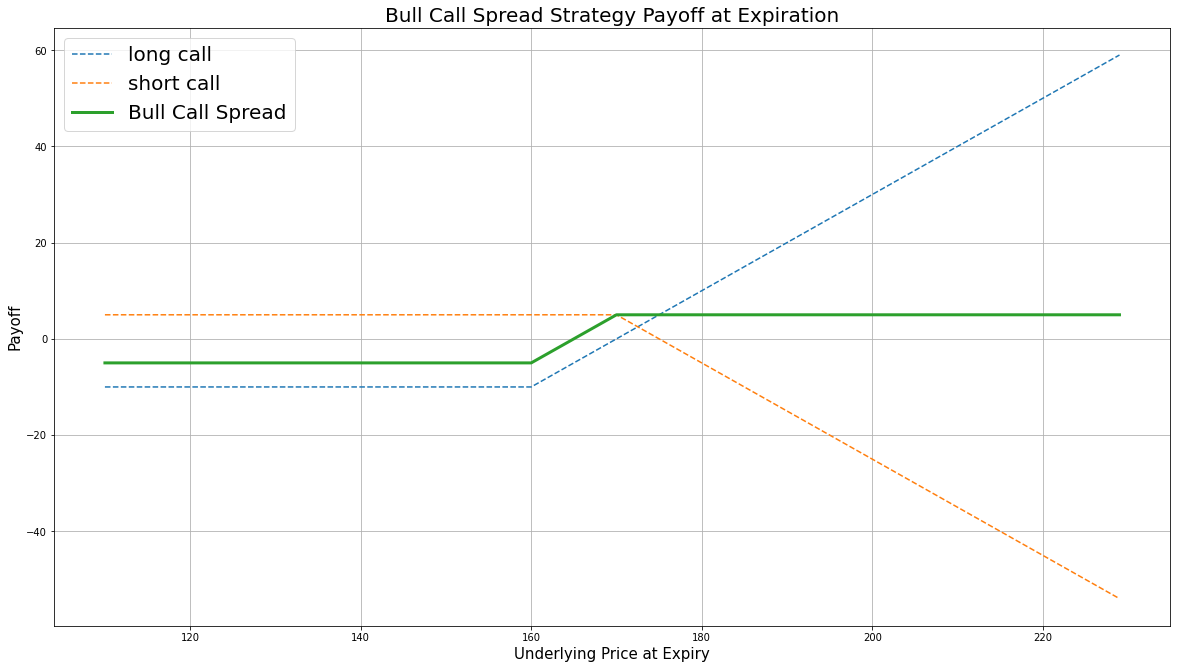

In [17]:
long_call_strike = 160
long_call_price = 10
short_call_strike = 170
short_call_price = 5

legs = []
legs.append(long_call(premium=long_call_price, strike = long_call_strike, uprices = uprices))
legs.append(short_call(premium=short_call_price, strike = short_call_strike, uprices = uprices))

plot_strategy_payoff("Bull Call Spread", legs)

### Bear Put Spread

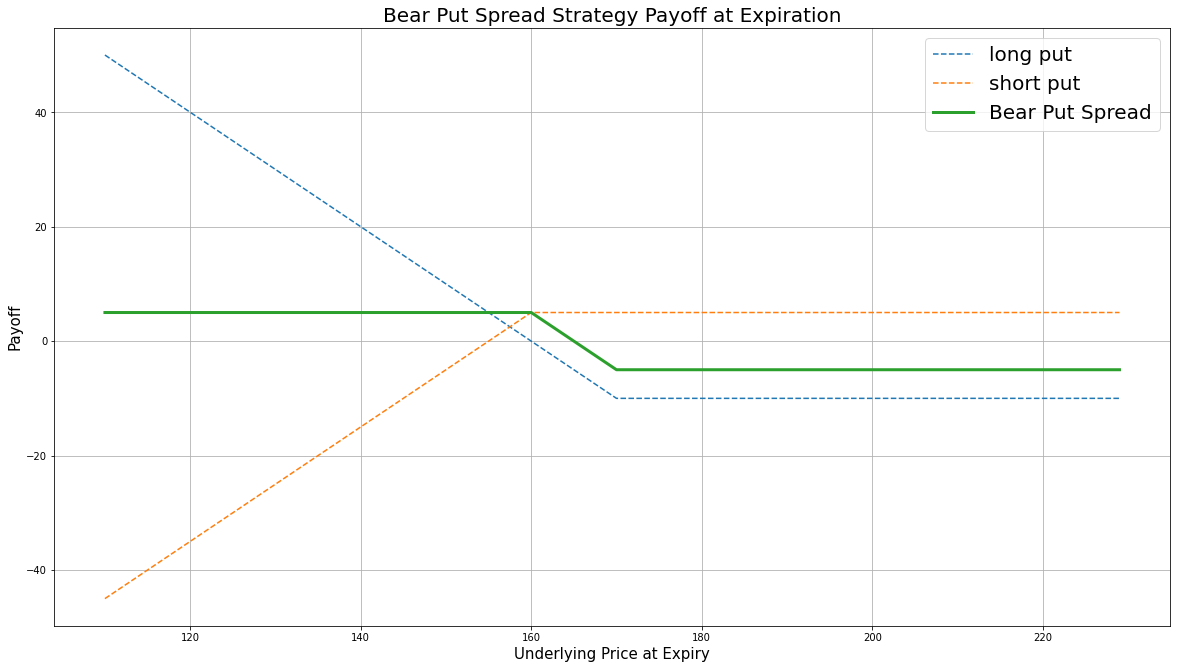

In [18]:
long_put_strike = 170
long_put_price = 10
short_put_strike = 160
short_put_price = 5

legs = []
legs.append(long_put(premium=long_put_price, strike = long_put_strike, uprices = uprices))
legs.append(short_put(premium=short_put_price, strike = short_put_strike, uprices = uprices))

plot_strategy_payoff("Bear Put Spread", legs)

### Protective Collar

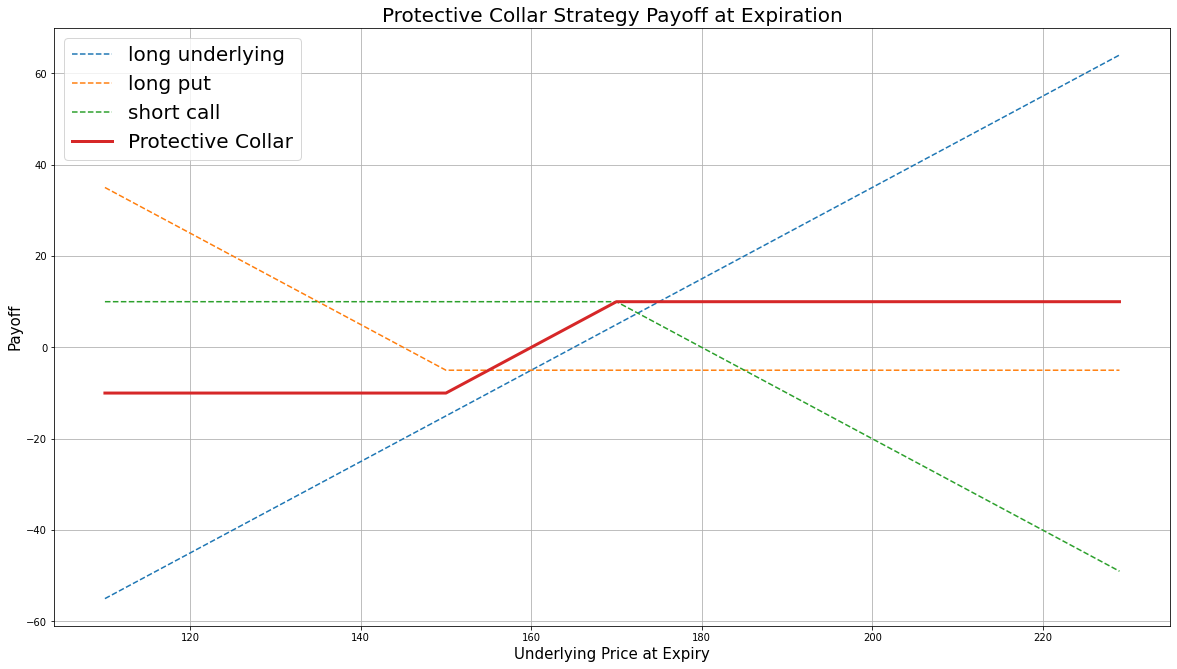

In [19]:
underlying_price = 165
long_put_strike = 150
long_put_price = 5
short_call_strike = 170
short_call_price = 10

legs = []
legs.append(long_underlying(price = underlying_price, uprices = uprices))
legs.append(long_put(premium=long_put_price, strike = long_put_strike, uprices = uprices))
legs.append(short_call(premium=short_call_price, strike = short_call_strike, uprices = uprices))

plot_strategy_payoff("Protective Collar", legs)

## Strangles

### Long strangle

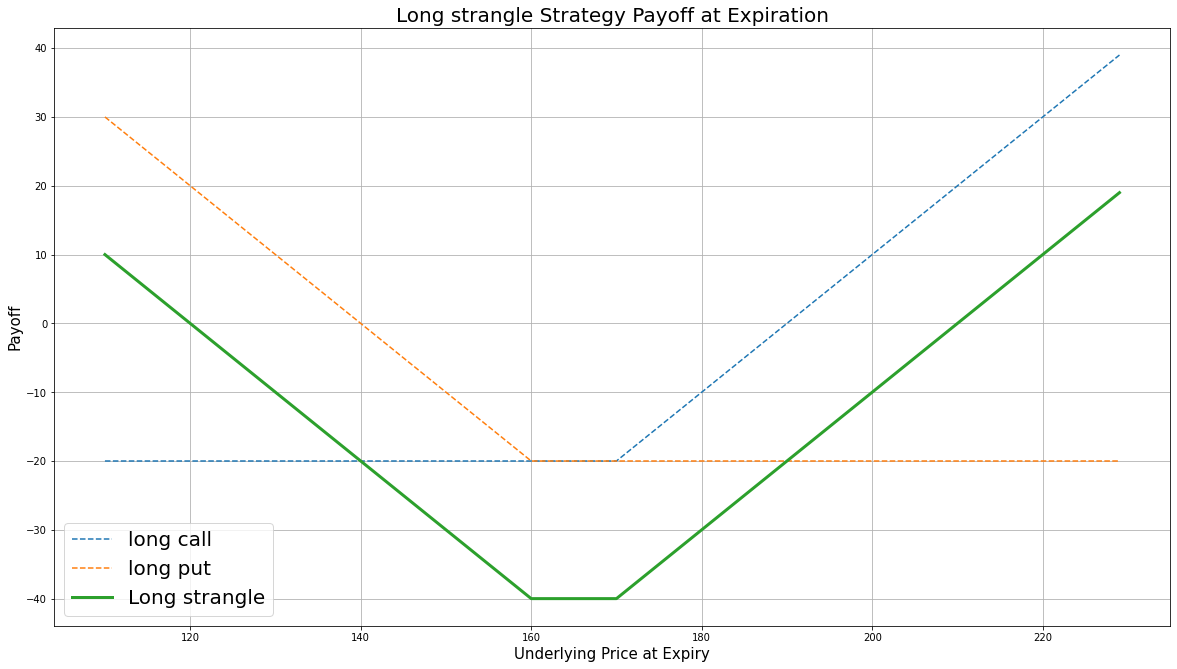

In [20]:
call_strike = 170
put_strike = 160

call_price = 20
put_price = 20

legs = []
legs.append(long_call(premium=call_price, strike = call_strike, uprices = uprices))
legs.append(long_put(premium=put_price, strike = put_strike, uprices = uprices))

plot_strategy_payoff("Long strangle", legs)

### Short Strangle

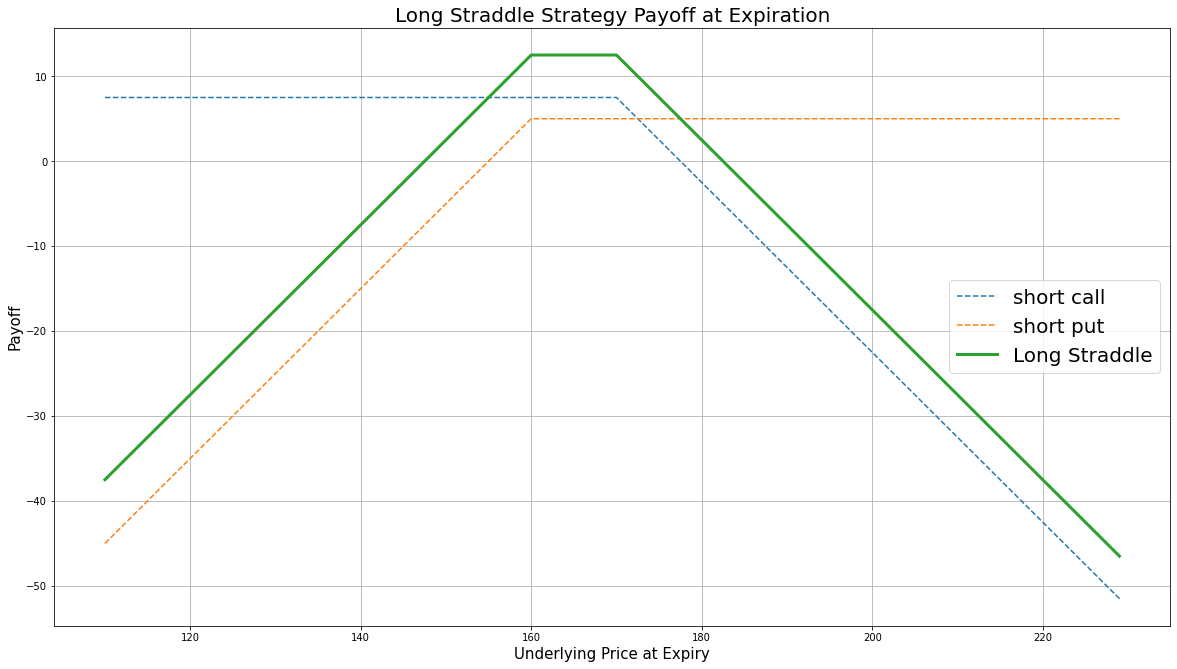

In [21]:
call_strike = 170
put_strike = 160

call_price = 7.5
put_price = 5

legs = []
legs.append(short_call(premium=call_price, strike = call_strike, uprices = uprices))
legs.append(short_put(premium=put_price, strike = put_strike, uprices = uprices))

plot_strategy_payoff("Long Straddle", legs)

## Straddle

### Long Straddle

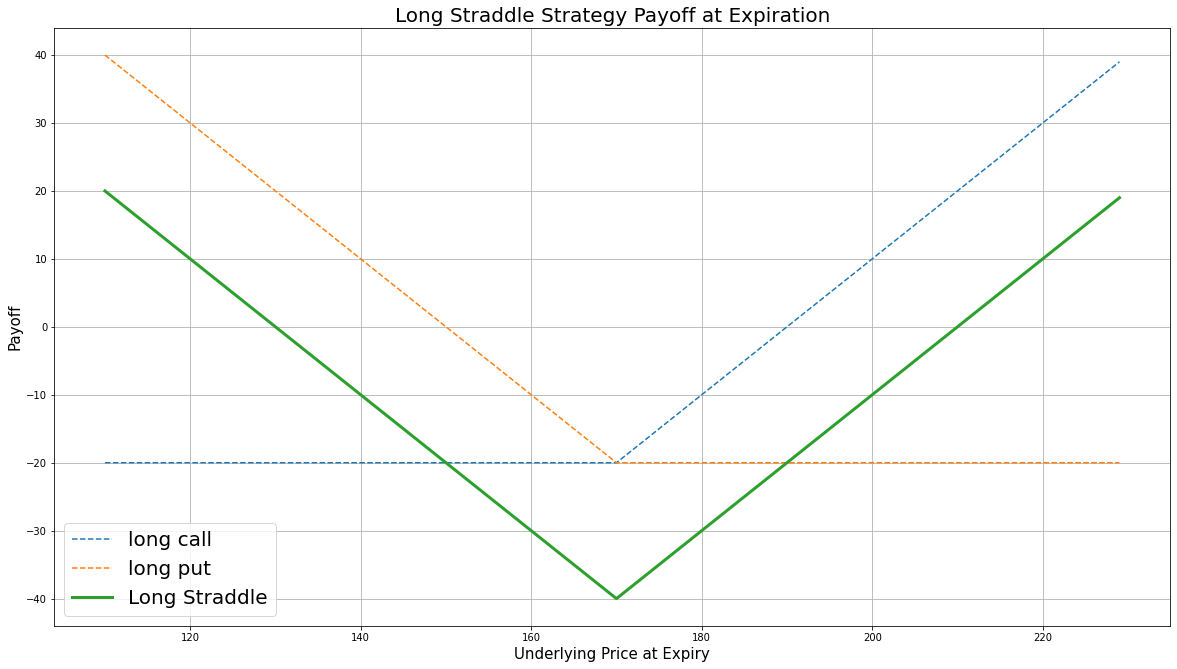

In [22]:
call_strike = 170
put_strike = 170

call_price = 20
put_price = 20

legs = []
legs.append(long_call(premium=call_price, strike = call_strike, uprices = uprices))
legs.append(long_put(premium=put_price, strike = put_strike, uprices = uprices))

plot_strategy_payoff("Long Straddle", legs)

## Spread Strategies

### Long Call Butterfly Spread
 bull spread and a bear spread 
 
 purchasing one in-the-money call option at a lower strike price, while also selling two at-the-money call options and buying one out-of-the-money call option. A balanced butterfly spread will have the same wing widths. This example is called a “call fly” and it results in a net debit. An investor would enter into a long butterfly call spread when they think the stock will not move much before expiration.



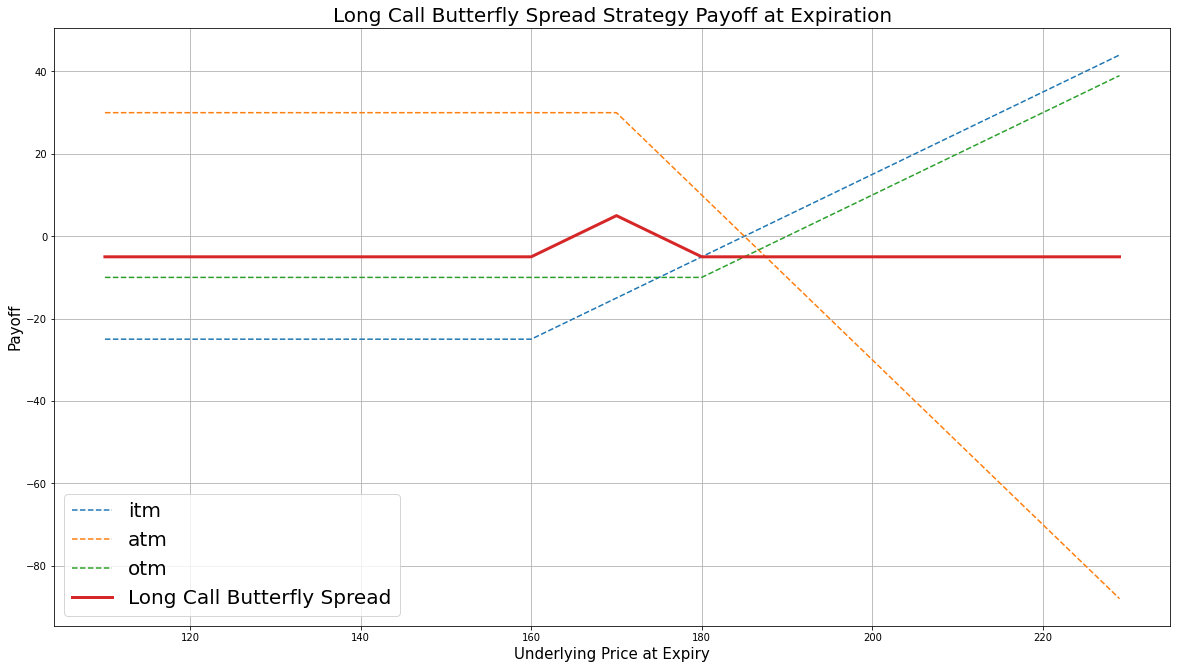

In [23]:
itm_call_strike = 160
atm_call_strike = 170; atm_contracts = 2
otm_call_strike = 180

itm_call_px = 25
atm_call_px = 15
otm_call_px = 10

legs = []
legs.append(long_call(premium=itm_call_px, strike = itm_call_strike, uprices = uprices, label='itm'))
legs.append(short_call(premium=atm_call_px, strike = atm_call_strike, uprices = uprices, label='atm', multiplier=atm_contracts))
legs.append(long_call(premium=otm_call_px, strike = otm_call_strike, uprices = uprices, label='otm'))

plot_strategy_payoff("Long Call Butterfly Spread", legs)

### Iron Condor

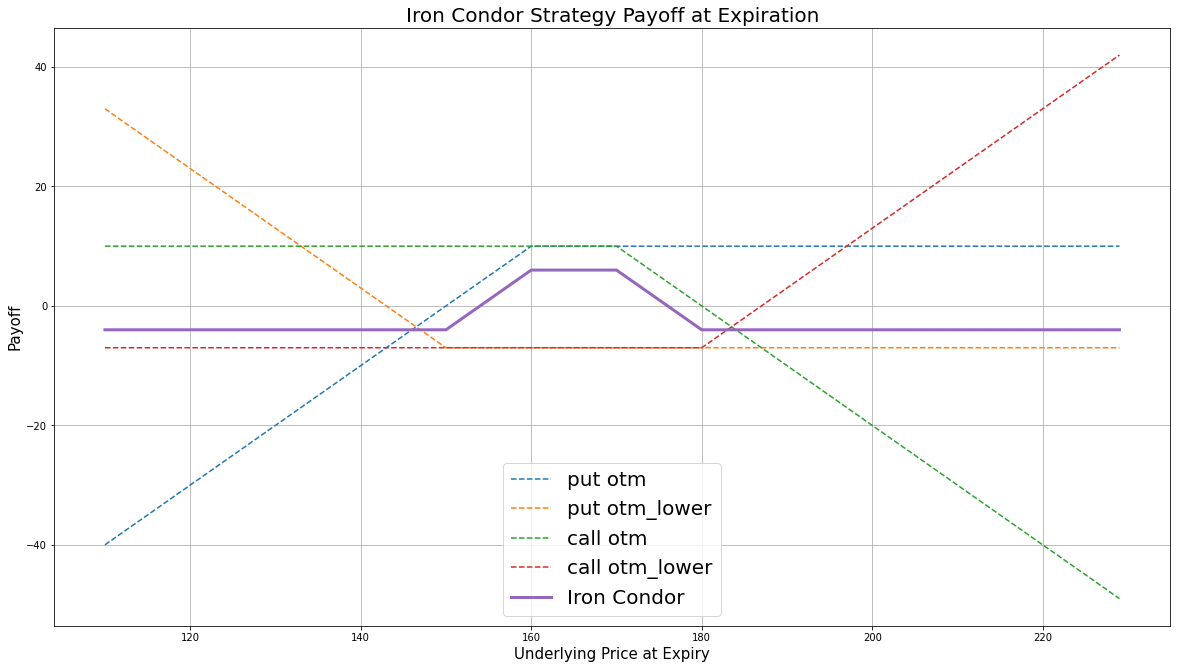

In [24]:
otm_strike = 160
otm2_strike = 155


legs = []
legs.append(short_put(premium=10, strike = 160, uprices = uprices, label='put otm'))
legs.append(long_put(premium=7, strike = 150, uprices = uprices, label='put otm_lower'))
legs.append(short_call(premium=10, strike = 170, uprices = uprices, label='call otm'))
legs.append(long_call(premium=7, strike = 180, uprices = uprices, label='call otm_lower'))

plot_strategy_payoff("Iron Condor", legs)

### Iron Butterfly
an investor will sell an at-the-money put and buy an out-of-the-money put. At the same time, they will also sell an at-the-money call and buy an out-of-the-money call. All options have the same expiration date and are on the same underlying asset.
2
 Although this strategy is similar to a butterfly spread, it uses both calls and puts (as opposed to one or the other).



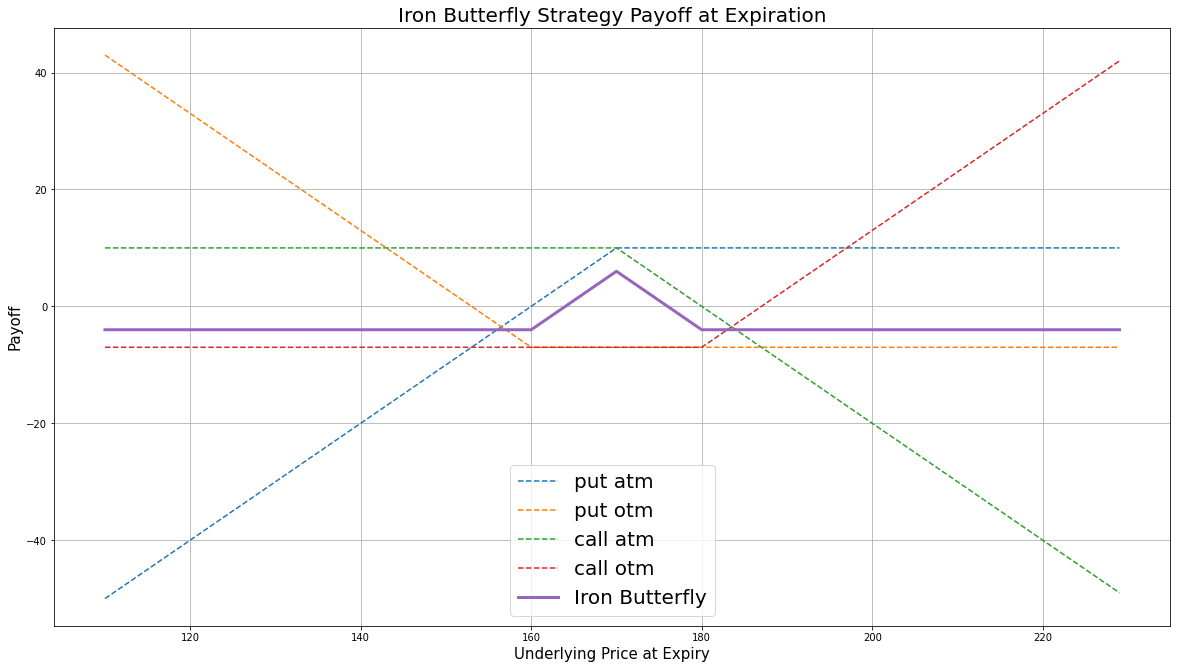

In [25]:

legs = []
legs.append(short_put(premium=10, strike = 170, uprices = uprices, label='put atm'))
legs.append(long_put(premium=7, strike = 160, uprices = uprices, label='put otm'))
legs.append(short_call(premium=10, strike = 170, uprices = uprices, label='call atm'))
legs.append(long_call(premium=7, strike = 180, uprices = uprices, label='call otm'))

plot_strategy_payoff("Iron Butterfly", legs)